In [76]:
import pandas as pd

# Load the dataset (adjust file path if needed)
df = pd.read_csv("ACST.csv")

# EDA
# 1. Structure & Overview

In [78]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-02-07,12.1,12.1,12.1,12.1,12.1,0
1,2012-02-08,12.1,12.1,12.1,12.1,12.1,0
2,2012-02-09,12.1,12.1,12.1,12.1,12.1,0
3,2012-02-10,12.1,12.1,12.1,12.1,12.1,0
4,2012-02-13,12.1,12.1,12.1,12.1,12.1,0
5,2012-02-14,16.5,16.5,16.5,16.5,16.5,100
6,2012-02-15,16.5,16.5,16.5,16.5,16.5,0
7,2012-02-16,16.5,16.5,16.5,16.5,16.5,0
8,2012-02-17,16.5,16.5,16.5,16.5,16.5,0
9,2012-02-21,16.5,16.5,16.5,16.5,16.5,0


In [79]:
print(df.shape)
print(df.columns)
print(df.info())

(2051, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2051 non-null   object 
 1   Open       2051 non-null   float64
 2   High       2051 non-null   float64
 3   Low        2051 non-null   float64
 4   Close      2051 non-null   float64
 5   Adj Close  2051 non-null   float64
 6   Volume     2051 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 112.3+ KB
None


# Quality Check

In [80]:
# df.isnull().sum()
# df.nunique()
df = df.drop_duplicates()
# df[df.duplicated()]
df.duplicated().sum()



np.int64(0)

# Summary Statistics

In [81]:
df.describe()
df[['Close','High','Low']].skew()
df.select_dtypes(include='number').skew()

Open          1.279299
High          1.292320
Low           1.268025
Close         1.281132
Adj Close     1.281132
Volume       16.018438
dtype: float64

In [82]:
import numpy as np
# Apply log transformation only
df['Volume_log'] = np.log1p(df['Volume'])  # log(1 + Volume)

In [83]:
df.select_dtypes(include='number').corr()

,Open,High,Low,Close,Adj Close,Volume,Volume_log
Open,1.000000,0.998583,0.998629,0.998693,0.998693,-0.147114,-0.636063
High,0.998583,1.000000,0.997400,0.998642,0.998642,-0.144448,-0.626462
Low,0.998629,0.997400,1.000000,0.999237,0.999237,-0.148593,-0.649364
Close,0.998693,0.998642,0.999237,1.000000,1.000000,-0.145913,-0.637873
Adj Close,0.998693,0.998642,0.999237,1.000000,1.000000,-0.145913,-0.637873
Volume,-0.147114,-0.144448,-0.148593,-0.145913,-0.145913,1.000000,0.331871
Volume_log,-0.636063,-0.626462,-0.649364,-0.637873,-0.637873,0.331871,1.000000


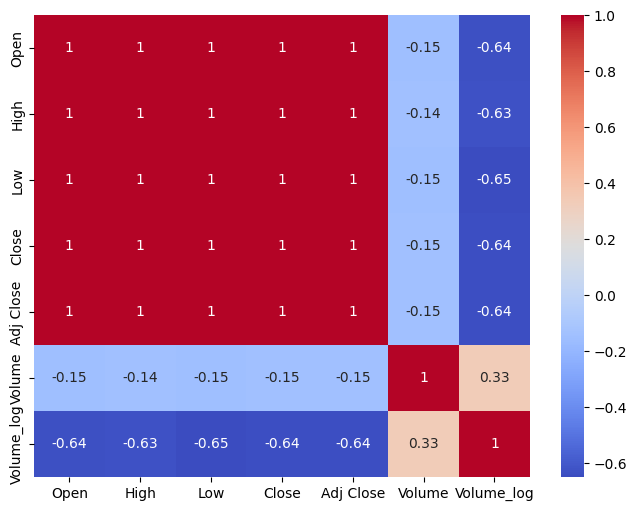

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.show()


In [85]:
df.select_dtypes(include='number').cov()

,Open,High,Low,Close,Adj Close,Volume,Volume_log
Open,8.461021e+01,8.580412e+01,8.278057e+01,8.425929e+01,8.425929e+01,-2.415843e+06,-2.242777e+01
High,8.580412e+01,8.726201e+01,8.396432e+01,8.556510e+01,8.556510e+01,-2.408955e+06,-2.243274e+01
Low,8.278057e+01,8.396432e+01,8.121306e+01,8.259537e+01,8.259537e+01,-2.390645e+06,-2.243242e+01
Close,8.425929e+01,8.556510e+01,8.259537e+01,8.412955e+01,8.412955e+01,-2.389310e+06,-2.242762e+01
Adj Close,8.425929e+01,8.556510e+01,8.259537e+01,8.412955e+01,8.412955e+01,-2.389310e+06,-2.242762e+01
Volume,-2.415843e+06,-2.408955e+06,-2.390645e+06,-2.389310e+06,-2.389310e+06,3.187196e+12,2.271162e+06
Volume_log,-2.242777e+01,-2.243274e+01,-2.243242e+01,-2.242762e+01,-2.242762e+01,2.271162e+06,1.469432e+01


# Time Series Preparation

In [86]:
#  Convert 'Date' column to proper datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort data by date (oldest → newest)
df = df.sort_values('Date')

# Set 'Date' as the DataFrame index
df = df.set_index('Date')

# Sampling & Quick View


In [87]:
# df.sample(4)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,Volume_log
Date,,,,,,,
2020-03-19,0.26,0.28,0.25,0.28,0.28,896900,13.706701
2020-03-20,0.28,0.34,0.28,0.31,0.31,1100200,13.911003
2020-03-23,0.35,0.35,0.30,0.31,0.31,654700,13.391934
2020-03-24,0.32,0.34,0.31,0.33,0.33,620200,13.337799
2020-03-25,0.33,0.38,0.32,0.36,0.36,884200,13.692440
2020-03-26,0.42,0.42,0.38,0.41,0.41,1077600,13.890248
2020-03-27,0.43,0.43,0.36,0.40,0.40,562100,13.239437
2020-03-30,0.41,0.42,0.38,0.39,0.39,462500,13.044404
2020-03-31,0.40,0.40,0.35,0.38,0.38,1077200,13.889877


# Memory & Type Check

In [88]:
df.dtypes
df.memory_usage(deep=True)

Index         16408
Open          16408
High          16408
Low           16408
Close         16408
Adj Close     16408
Volume        16408
Volume_log    16408
dtype: int64

In [91]:
# df = df.drop('Volume', axis=1) # As we have log column column


In [92]:
df.columns.tolist()

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume_log']

In [94]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume_log
Date,,,,,,
2012-02-07,12.1,12.1,12.1,12.1,12.1,0.000000
2012-02-08,12.1,12.1,12.1,12.1,12.1,0.000000
2012-02-09,12.1,12.1,12.1,12.1,12.1,0.000000
2012-02-10,12.1,12.1,12.1,12.1,12.1,0.000000
2012-02-13,12.1,12.1,12.1,12.1,12.1,0.000000
2012-02-14,16.5,16.5,16.5,16.5,16.5,4.615121
2012-02-15,16.5,16.5,16.5,16.5,16.5,0.000000
2012-02-16,16.5,16.5,16.5,16.5,16.5,0.000000
2012-02-17,16.5,16.5,16.5,16.5,16.5,0.000000


In [ ]:
# # Prepare prophet DataFrame
# df = df.reset_index() # If not reset, you get error, because Date were index (in previouse step we did it)
# prophet_df = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})


In [ ]:
# train = prophet_df.iloc[:-30]   # first 970 days (training)
# test  = prophet_df.iloc[-30:]   # last 30 days (testing)


In [ ]:
# from prophet import Prophet

# model = Prophet()
# model.fit(train)


11:21:08 - cmdstanpy - INFO - Chain [1] start processing
11:21:11 - cmdstanpy - INFO - Chain [1] done processing


In [121]:

# Split data (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]

# Last value forecast (naive forecast)
last_value_forecast = [train.iloc[-1]] * len(test)

# Combine results for comparison
result = pd.DataFrame({
    'Actual': test.values,
    'Forecast': last_value_forecast
})

print(result.head(10))


   Actual  Forecast
0    0.46      0.47
1    0.46      0.47
2    0.45      0.47
3    0.46      0.47
4    0.48      0.47
5    0.49      0.47
6    0.48      0.47
7    0.49      0.47
8    0.50      0.47
9    0.54      0.47


In [122]:
# Moving Average Forecast
window_size = 5  # You can tune this (e.g., 3, 5, 10)
moving_avg_forecast = [train[-window_size:].mean()] * len(test)

result = pd.DataFrame({
    'Actual': test.values,
    'Forecast': moving_avg_forecast
})

print(result.head(10))


   Actual  Forecast
0    0.46     0.528
1    0.46     0.528
2    0.45     0.528
3    0.46     0.528
4    0.48     0.528
5    0.49     0.528
6    0.48     0.528
7    0.49     0.528
8    0.50     0.528
9    0.54     0.528


In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ----- 3️⃣ Calculate Error Metrics -----
mae_last = mean_absolute_error(test, last_value_forecast)
rmse_last = np.sqrt(mean_squared_error(test, last_value_forecast))

mae_ma = mean_absolute_error(test, moving_avg_forecast)
rmse_ma = np.sqrt(mean_squared_error(test, moving_avg_forecast))

# ----- 4️⃣ Print Results -----
print("📊 Last Value Forecast:")
print(f"MAE:  {mae_last:.6f}")
print(f"RMSE: {rmse_last:.6f}\n")

print("📊 Moving Average Forecast:")
print(f"MAE:  {mae_ma:.6f}")
print(f"RMSE: {rmse_ma:.6f}")

📊 Last Value Forecast:
MAE:  0.755231
RMSE: 0.965130

📊 Moving Average Forecast:
MAE:  0.707080
RMSE: 0.921255


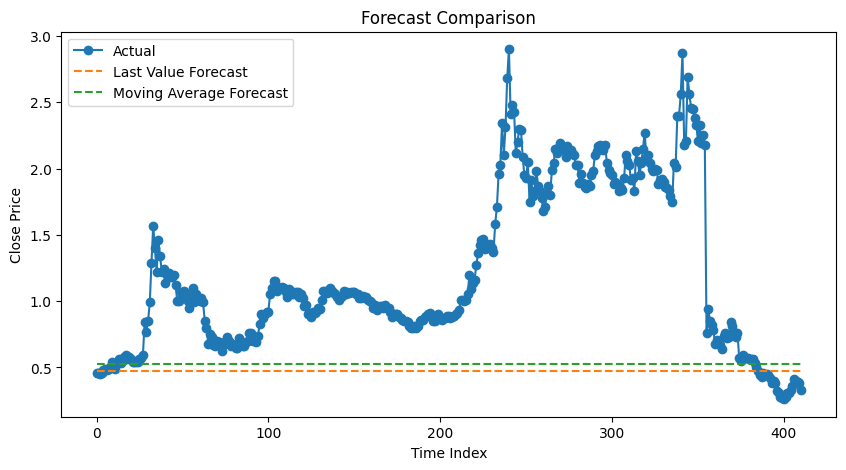

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(test.values, label='Actual', marker='o')
plt.plot(last_value_forecast, label='Last Value Forecast', linestyle='--')
plt.plot(moving_avg_forecast, label='Moving Average Forecast', linestyle='--')
plt.title('Forecast Comparison')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [ ]:
# from statsmodels.tsa.arima.model import ARIMA

# # Step 1: Use your original dataframe
# # Assuming df['Close'] has your closing prices and df['Date'] is your datetime column

# # Step 2: Split your data
# train_size = int(len(df) * 0.8)  # 80% train, 20% test
# train, test = df['Close'][:train_size], df['Close'][train_size:]

# # Step 3: Fit ARIMA model
# model = ARIMA(train, order=(5, 1, 0))  # (p, d, q)
# model_fit = model.fit()

# # Step 4: Forecast next 30 steps (or same length as test)
# forecast = model_fit.forecast(steps=30)

# # Step 5: View results
# print(forecast)


1640    0.471713
1641    0.469050
1642    0.470539
1643    0.469167
1644    0.470212
1645    0.469828
1646    0.470103
1647    0.469928
1648    0.470041
1649    0.469975
1650    0.470014
1651    0.469989
1652    0.470004
1653    0.469995
1654    0.470001
1655    0.469997
1656    0.469999
1657    0.469998
1658    0.469999
1659    0.469998
1660    0.469999
1661    0.469999
1662    0.469999
1663    0.469999
1664    0.469999
1665    0.469999
1666    0.469999
1667    0.469999
1668    0.469999
1669    0.469999
Name: predicted_mean, dtype: float64


In [107]:
prophet_df.head(10)

,ds,y
0,2012-02-07,12.1
1,2012-02-08,12.1
2,2012-02-09,12.1
3,2012-02-10,12.1
4,2012-02-13,12.1
5,2012-02-14,16.5
6,2012-02-15,16.5
7,2012-02-16,16.5
8,2012-02-17,16.5
9,2012-02-21,16.5


In [108]:

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
# print(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)


,ds,yhat,yhat_lower,yhat_upper
2021,2020-02-20,1.381140,-0.570238,3.130335
2022,2020-02-21,1.385288,-0.498885,3.244430
2023,2020-02-22,-2.507482,-4.469306,-0.634760
2024,2020-02-23,-2.486333,-4.350218,-0.623915
2025,2020-02-24,1.488324,-0.310568,3.581774
2026,2020-02-25,1.475234,-0.387434,3.205948
2027,2020-02-26,1.479451,-0.474708,3.405547
2028,2020-02-27,1.520053,-0.477238,3.187340
2029,2020-02-28,1.517989,-0.524192,3.479248
2030,2020-02-29,-2.382744,-4.208940,-0.650967


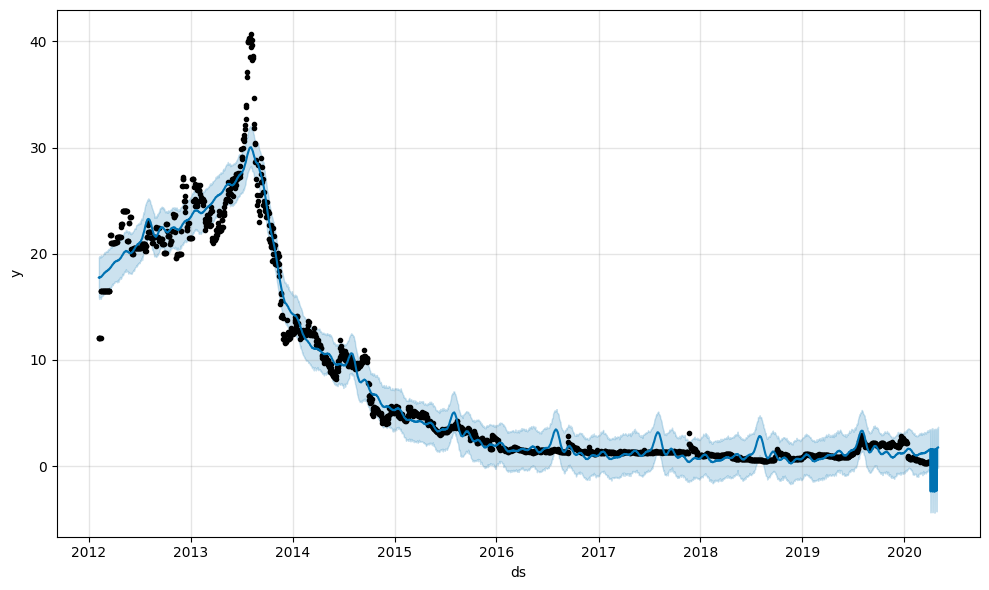

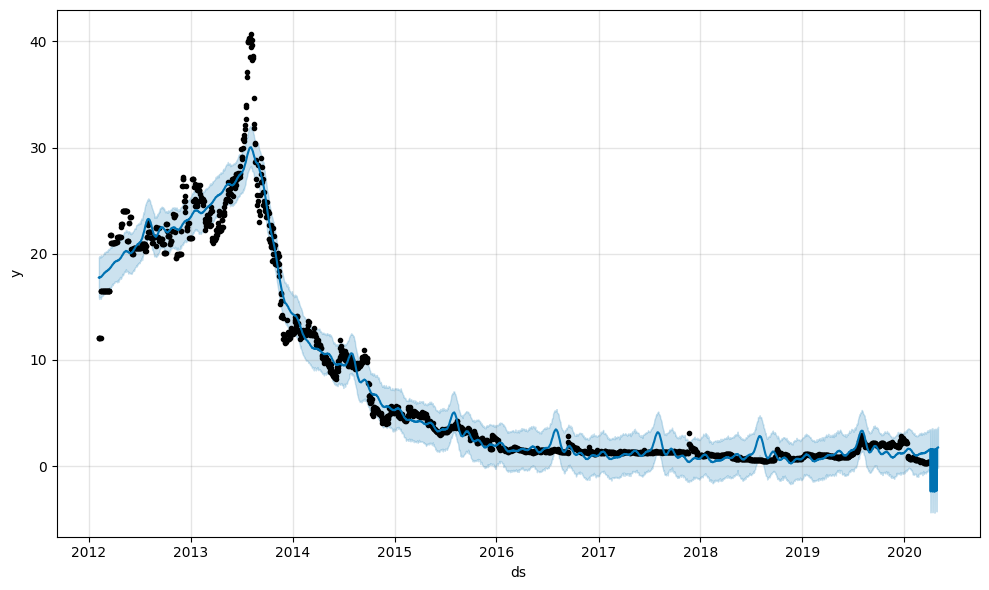

In [101]:
model.plot(forecast)

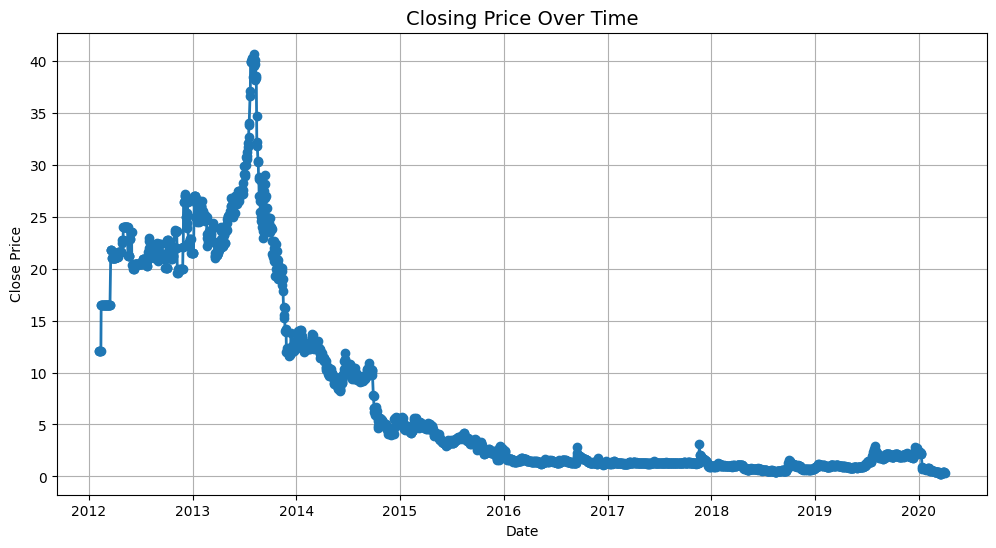

In [113]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], marker='o', linestyle='-', linewidth=2)

plt.title('Closing Price Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


In [118]:
print(df['Close'].var())


84.12955334069525
